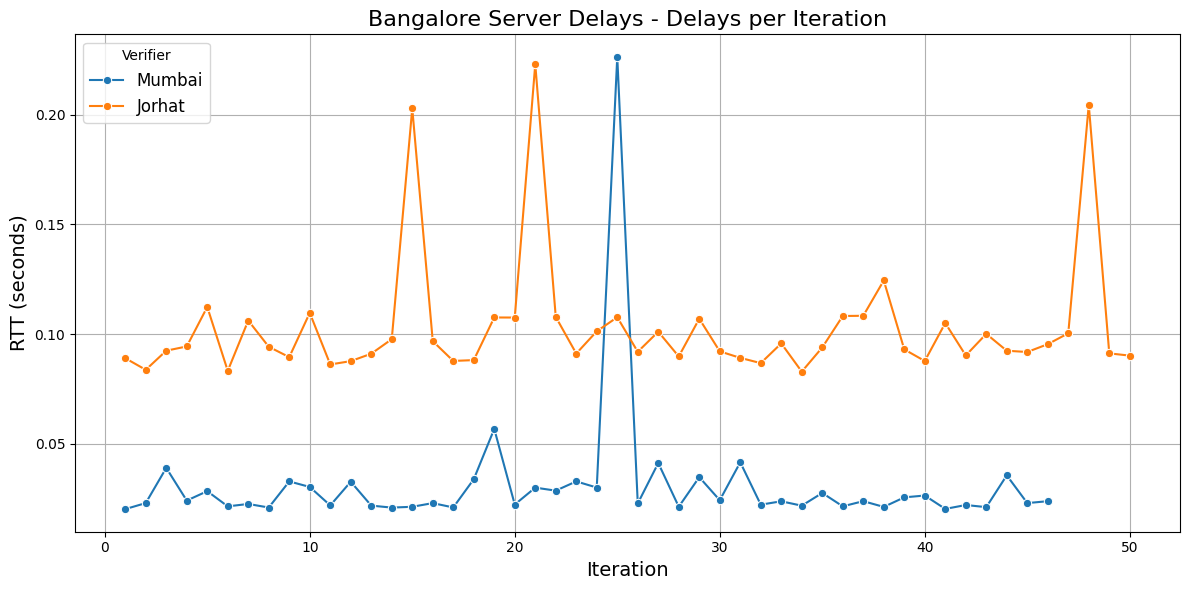

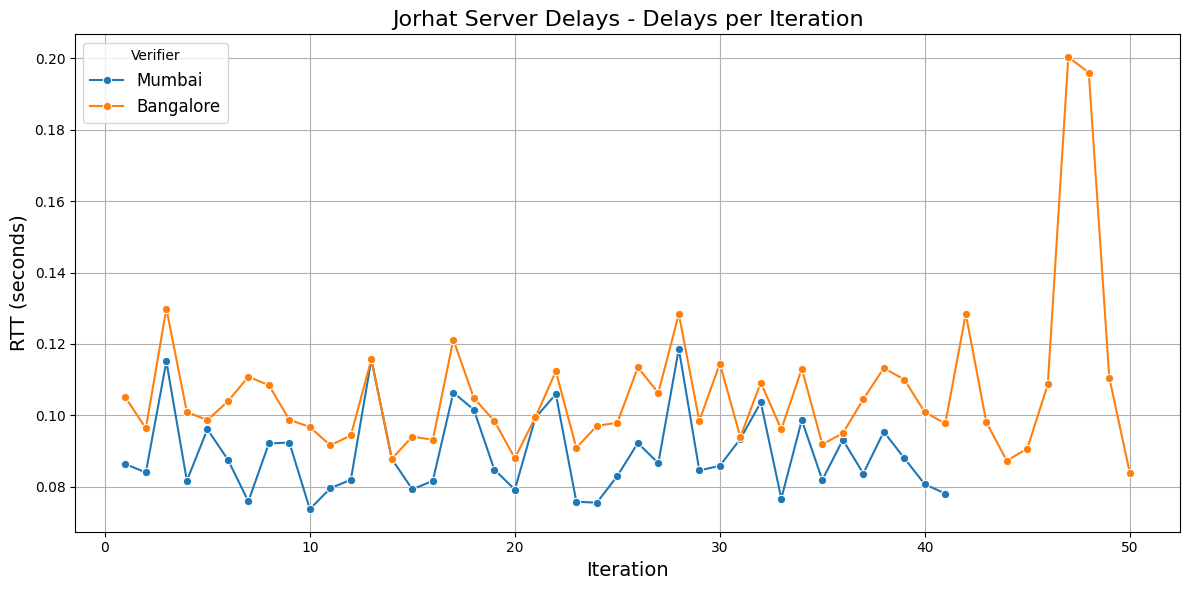

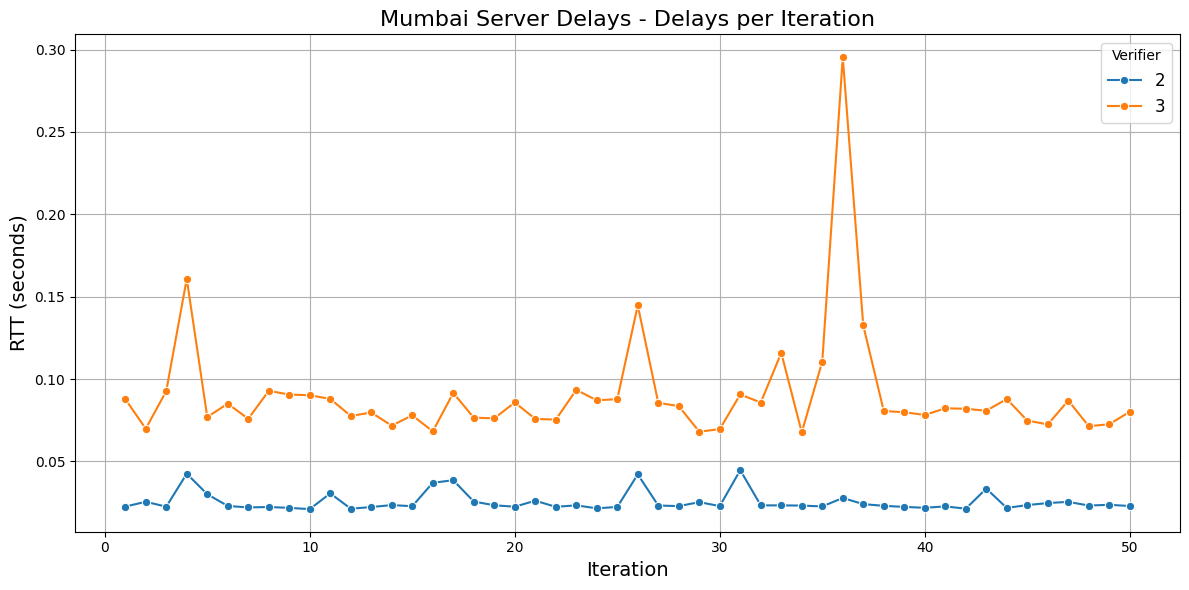

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

def parse_rtt_log(file_path):
    iterations, verifiers, rtts = [], [], []
    pattern = r"Iteration\s+(\d+),\s+Verifier\s+(?:server)?([a-zA-Z0-9]+):\s+RTT=([0-9.]+)"
    with open(file_path, 'r') as file:
        for line in file:
            match = re.match(pattern, line.strip())
            if match:
                iterations.append(int(match.group(1)))
                verifiers.append(match.group(2))
                rtts.append(float(match.group(3)))
    return pd.DataFrame({'Iteration': iterations, 'Verifier': verifiers, 'RTT': rtts})

blr_log_path = 'BLR-jorhat-blr-mumbai.txt'
jor_log_path = 'JOR-blr-johrat-mumbai.txt'
mum_log_path = 'MUM-johrat-blr-mumbai.txt'

df_blr = parse_rtt_log(blr_log_path)
df_jor = parse_rtt_log(jor_log_path)
df_mum = parse_rtt_log(mum_log_path)

def compute_average_delays(df):
    return df.groupby('Verifier')['RTT'].mean().reset_index().rename(columns={'RTT': 'Average RTT'})

avg_blr = compute_average_delays(df_blr)
avg_jor = compute_average_delays(df_jor)
avg_mum = compute_average_delays(df_mum)

def plot_delays(df, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Iteration', y='RTT', hue='Verifier', marker='o')
    plt.title(f'{title} - Delays per Iteration', fontsize=16)
    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel('RTT (seconds)', fontsize=14)
    plt.legend(title='Verifier', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_delays(df_blr, "Bangalore Server Delays")
plot_delays(df_jor, "Jorhat Server Delays")
plot_delays(df_mum, "Mumbai Server Delays")


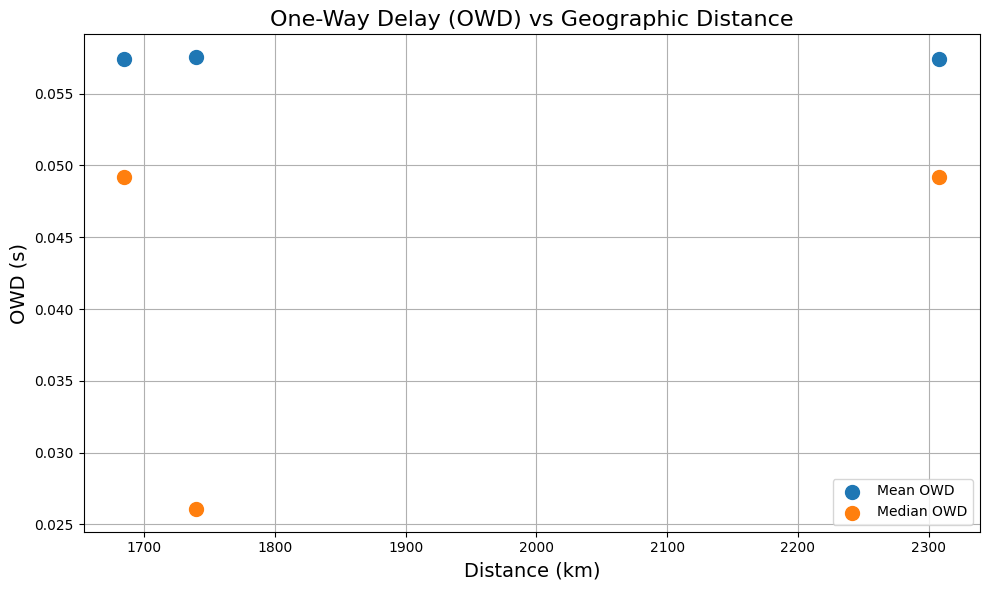

,Connection,Distance (km),Mean OWD (s),Median OWD (s)
0,Delhi to Bangalore,1740,0.057559,0.026061
1,Delhi to Jorhat,1685,0.057406,0.049186
2,Bangalore to Jorhat,2308,0.057406,0.049186


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def parse_rtt_log(log_lines, verifier_map, top_n=50):
    """
    Parse RTT log lines into a DataFrame with top N entries per iteration.

    Parameters:
    - log_lines: List of log lines as strings.
    - verifier_map: Dictionary mapping server numbers to server names.
    - top_n: Number of top iterations to include.

    Returns:
    - DataFrame containing parsed RTT data.
    """
    data = []
    for line in log_lines:
        parts = line.split(",")
        if len(parts) == 2:
            iteration = int(parts[0].split("Iteration")[1].strip())
            verifier, rtt = parts[1].strip().split(": RTT=")
            verifier = verifier_map.get(verifier.split()[-1], verifier)
            data.append({"Iteration": iteration, "Verifier": verifier, "RTT (s)": float(rtt)})
    
    df = pd.DataFrame(data).sort_values("Iteration")
    return df[df["Iteration"] <= top_n]

rtt_bangalore_log = """
Iteration 1, Verifier server2: RTT=0.049311
Iteration 1, Verifier server3: RTT=0.092780
Iteration 2, Verifier server2: RTT=0.054290
Iteration 2, Verifier server3: RTT=0.088019
Iteration 3, Verifier server2: RTT=0.050411
Iteration 3, Verifier server3: RTT=0.092123
Iteration 4, Verifier server2: RTT=0.048932
Iteration 4, Verifier server3: RTT=0.123780
Iteration 5, Verifier server2: RTT=0.048285
Iteration 5, Verifier server3: RTT=0.134534
Iteration 6, Verifier server2: RTT=0.051805
Iteration 6, Verifier server3: RTT=0.090699
Iteration 7, Verifier server2: RTT=0.051455
Iteration 7, Verifier server3: RTT=0.094162
Iteration 8, Verifier server2: RTT=0.048857
Iteration 8, Verifier server3: RTT=0.090342
Iteration 9, Verifier server2: RTT=0.051269
Iteration 9, Verifier server3: RTT=0.099650
Iteration 10, Verifier server2: RTT=0.059449
Iteration 10, Verifier server3: RTT=0.107001
Iteration 11, Verifier server2: RTT=0.055766
Iteration 11, Verifier server3: RTT=0.091153
Iteration 12, Verifier server2: RTT=0.048700
Iteration 12, Verifier server3: RTT=0.091534
Iteration 13, Verifier server2: RTT=0.052112
Iteration 13, Verifier server3: RTT=0.111523
Iteration 14, Verifier server2: RTT=0.048493
Iteration 14, Verifier server3: RTT=0.099511
Iteration 15, Verifier server2: RTT=0.056567
Iteration 15, Verifier server3: RTT=0.140245
Iteration 16, Verifier server2: RTT=0.051727
Iteration 16, Verifier server3: RTT=0.091640
Iteration 17, Verifier server2: RTT=0.082332
Iteration 17, Verifier server3: RTT=0.089423
Iteration 18, Verifier server2: RTT=0.081713
Iteration 18, Verifier server3: RTT=0.090698
Iteration 19, Verifier server2: RTT=0.081263
Iteration 19, Verifier server3: RTT=0.117612
Iteration 20, Verifier server3: RTT=0.131282
Iteration 20, Verifier server2: RTT=0.637578
Iteration 21, Verifier server2: RTT=0.081437
Iteration 21, Verifier server3: RTT=0.088412
Iteration 22, Verifier server2: RTT=0.046740
Iteration 22, Verifier server3: RTT=0.090784
Iteration 23, Verifier server2: RTT=0.047850
Iteration 23, Verifier server3: RTT=0.091649
Iteration 24, Verifier server2: RTT=0.048244
Iteration 24, Verifier server3: RTT=0.199156
Iteration 25, Verifier server2: RTT=0.052211
Iteration 25, Verifier server3: RTT=0.137315
Iteration 26, Verifier server2: RTT=0.046245
Iteration 26, Verifier server3: RTT=0.099493
Iteration 27, Verifier server2: RTT=0.047178
Iteration 27, Verifier server3: RTT=0.147828
Iteration 28, Verifier server3: RTT=0.089330
Iteration 28, Verifier server2: RTT=0.090736
Iteration 29, Verifier server3: RTT=0.089487
Iteration 29, Verifier server2: RTT=0.303552
Iteration 30, Verifier server2: RTT=0.087088
Iteration 30, Verifier server3: RTT=0.097699
Iteration 31, Verifier server2: RTT=0.088213
Iteration 31, Verifier server3: RTT=0.100193
Iteration 32, Verifier server3: RTT=0.090720
Iteration 32, Verifier server2: RTT=1.833598
Iteration 33, Verifier server2: RTT=0.053049
Iteration 33, Verifier server3: RTT=0.090436
Iteration 34, Verifier server2: RTT=0.066849
Iteration 34, Verifier server3: RTT=0.101169
Iteration 35, Verifier server2: RTT=0.046495
Iteration 35, Verifier server3: RTT=0.107939
Iteration 36, Verifier server2: RTT=0.048296
Iteration 36, Verifier server3: RTT=0.098424
Iteration 37, Verifier server2: RTT=0.055677
Iteration 37, Verifier server3: RTT=0.100137
Iteration 38, Verifier server2: RTT=0.046062
Iteration 38, Verifier server3: RTT=0.088654
Iteration 39, Verifier server2: RTT=0.054933
Iteration 39, Verifier server3: RTT=0.106164
Iteration 40, Verifier server2: RTT=0.087213
Iteration 40, Verifier server3: RTT=0.095293
Iteration 41, Verifier server3: RTT=0.089974
Iteration 41, Verifier server2: RTT=1.082719
Iteration 42, Verifier server2: RTT=0.077933
Iteration 42, Verifier server3: RTT=0.098372
Iteration 43, Verifier server2: RTT=0.051517
Iteration 43, Verifier server3: RTT=0.091412
Iteration 44, Verifier server2: RTT=0.049245
Iteration 44, Verifier server3: RTT=0.101099
Iteration 45, Verifier server2: RTT=0.059215
Iteration 45, Verifier server3: RTT=0.096540
Iteration 46, Verifier server2: RTT=0.065181
Iteration 46, Verifier server3: RTT=0.111393
Iteration 47, Verifier server2: RTT=0.052826
Iteration 47, Verifier server3: RTT=0.400024
Iteration 48, Verifier server2: RTT=0.056635
Iteration 48, Verifier server3: RTT=0.185048
Iteration 49, Verifier server2: RTT=0.122084
Iteration 49, Verifier server3: RTT=0.273974
""".strip().split("\n")

rtt_delhi_log = """
Iteration 1, Verifier server1: RTT=0.049336
Iteration 1, Verifier server3: RTT=0.147073
Iteration 2, Verifier server1: RTT=0.049214
Iteration 2, Verifier server3: RTT=0.061597
Iteration 3, Verifier server1: RTT=0.049308
Iteration 3, Verifier server3: RTT=0.061859
Iteration 4, Verifier server3: RTT=0.089171
Iteration 4, Verifier server1: RTT=0.098027
Iteration 5, Verifier server1: RTT=0.049575
Iteration 5, Verifier server3: RTT=0.063816
Iteration 6, Verifier server1: RTT=0.048354
Iteration 6, Verifier server3: RTT=0.072567
Iteration 7, Verifier server1: RTT=0.049117
Iteration 7, Verifier server3: RTT=0.120333
Iteration 8, Verifier server1: RTT=0.050527
Iteration 8, Verifier server3: RTT=0.066580
Iteration 9, Verifier server1: RTT=0.051248
Iteration 9, Verifier server3: RTT=0.063955
Iteration 10, Verifier server1: RTT=0.049372
Iteration 10, Verifier server3: RTT=0.062313
Iteration 11, Verifier server1: RTT=0.049501
Iteration 11, Verifier server3: RTT=0.074151
Iteration 12, Verifier server1: RTT=0.049983
Iteration 12, Verifier server3: RTT=0.068040
Iteration 13, Verifier server3: RTT=0.065695
Iteration 13, Verifier server1: RTT=0.100338
Iteration 14, Verifier server1: RTT=0.052786
Iteration 14, Verifier server3: RTT=0.060400
Iteration 15, Verifier server3: RTT=0.133351
Iteration 15, Verifier server1: RTT=0.302630
Iteration 16, Verifier server3: RTT=0.062672
Iteration 16, Verifier server1: RTT=0.156066
Iteration 17, Verifier server1: RTT=0.080196
Iteration 17, Verifier server3: RTT=0.090341
Iteration 18, Verifier server3: RTT=0.070525
Iteration 18, Verifier server1: RTT=0.092174
Iteration 19, Verifier server1: RTT=0.078536
Iteration 19, Verifier server3: RTT=0.090374
Iteration 20, Verifier server1: RTT=0.046789
Iteration 20, Verifier server3: RTT=0.176614
Iteration 21, Verifier server1: RTT=0.046559
Iteration 21, Verifier server3: RTT=0.062776
Iteration 22, Verifier server1: RTT=0.049117
Iteration 22, Verifier server3: RTT=0.127837
Iteration 23, Verifier server1: RTT=0.051500
Iteration 23, Verifier server3: RTT=0.347373
Iteration 24, Verifier server1: RTT=0.055972
Iteration 24, Verifier server3: RTT=0.070957
Iteration 25, Verifier server3: RTT=0.060739
Iteration 25, Verifier server1: RTT=0.081788
Iteration 26, Verifier server3: RTT=0.079256
Iteration 26, Verifier server1: RTT=0.397620
Iteration 27, Verifier server3: RTT=0.069606
Iteration 27, Verifier server1: RTT=0.080067
Iteration 28, Verifier server1: RTT=0.048503
Iteration 28, Verifier server3: RTT=0.063434
Iteration 29, Verifier server3: RTT=0.082819
Iteration 29, Verifier server1: RTT=0.112465
Iteration 30, Verifier server1: RTT=0.109347
Iteration 30, Verifier server3: RTT=0.109788
Iteration 31, Verifier server3: RTT=0.075295
Iteration 31, Verifier server1: RTT=0.102232
Iteration 32, Verifier server1: RTT=0.054042
Iteration 32, Verifier server3: RTT=0.111094
Iteration 33, Verifier server1: RTT=0.045130
Iteration 33, Verifier server3: RTT=0.573772
Iteration 34, Verifier server1: RTT=0.044621
Iteration 34, Verifier server3: RTT=0.181912
Iteration 35, Verifier server1: RTT=0.083645
Iteration 35, Verifier server3: RTT=0.123583
Iteration 36, Verifier server1: RTT=0.080979
Iteration 36, Verifier server3: RTT=0.131177
Iteration 37, Verifier server1: RTT=0.047885
Iteration 37, Verifier server3: RTT=0.062145
Iteration 38, Verifier server1: RTT=0.049531
Iteration 38, Verifier server3: RTT=0.145112
Iteration 39, Verifier server1: RTT=0.052122
Iteration 39, Verifier server3: RTT=0.070906
Iteration 40, Verifier server3: RTT=0.072546
Iteration 40, Verifier server1: RTT=0.074798
Iteration 41, Verifier server3: RTT=0.064059
Iteration 42, Verifier server3: RTT=0.061469
Iteration 42, Verifier server1: RTT=1.498802
Iteration 43, Verifier server3: RTT=0.061691
Iteration 44, Verifier server3: RTT=0.069569
Iteration 45, Verifier server3: RTT=0.069460
Iteration 46, Verifier server3: RTT=0.062456
Iteration 47, Verifier server3: RTT=0.060514
Iteration 48, Verifier server3: RTT=0.139729
Iteration 49, Verifier server3: RTT=0.069174
Iteration 50, Verifier server3: RTT=0.068833
""".strip().split("\n")

verifier_map = {"server1": "Bangalore", "server2": "Delhi", "server3": "Jorhat"}

df_bangalore = parse_rtt_log(rtt_bangalore_log, verifier_map)
df_delhi = parse_rtt_log(rtt_delhi_log, verifier_map)

df_bangalore["OWD (s)"] = df_bangalore["RTT (s)"] / 2
df_delhi["OWD (s)"] = df_delhi["RTT (s)"] / 2

mean_owd_bangalore = df_bangalore.groupby("Verifier")["OWD (s)"].mean()
median_owd_bangalore = df_bangalore.groupby("Verifier")["OWD (s)"].median()
mean_owd_delhi = df_delhi.groupby("Verifier")["OWD (s)"].mean()
median_owd_delhi = df_delhi.groupby("Verifier")["OWD (s)"].median()

distances_km = {
    ("Delhi", "Bangalore"): 1740,
    ("Delhi", "Jorhat"): 1685,
    ("Bangalore", "Jorhat"): 2308,
}

distance_owd = pd.DataFrame({
    "Connection": [f"{src} to {dst}" for src, dst in distances_km.keys()],
    "Distance (km)": list(distances_km.values()),
    "Mean OWD (s)": [mean_owd_bangalore.get(dst, mean_owd_delhi.get(dst, np.nan)) for src, dst in distances_km.keys()],
    "Median OWD (s)": [median_owd_bangalore.get(dst, median_owd_delhi.get(dst, np.nan)) for src, dst in distances_km.keys()],
})

plt.figure(figsize=(10, 6))
plt.scatter(distance_owd["Distance (km)"], distance_owd["Mean OWD (s)"], label="Mean OWD", s=100)
plt.scatter(distance_owd["Distance (km)"], distance_owd["Median OWD (s)"], label="Median OWD", s=100)
plt.title("One-Way Delay (OWD) vs Geographic Distance", fontsize=16)
plt.xlabel("Distance (km)", fontsize=14)
plt.ylabel("OWD (s)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

distance_owd


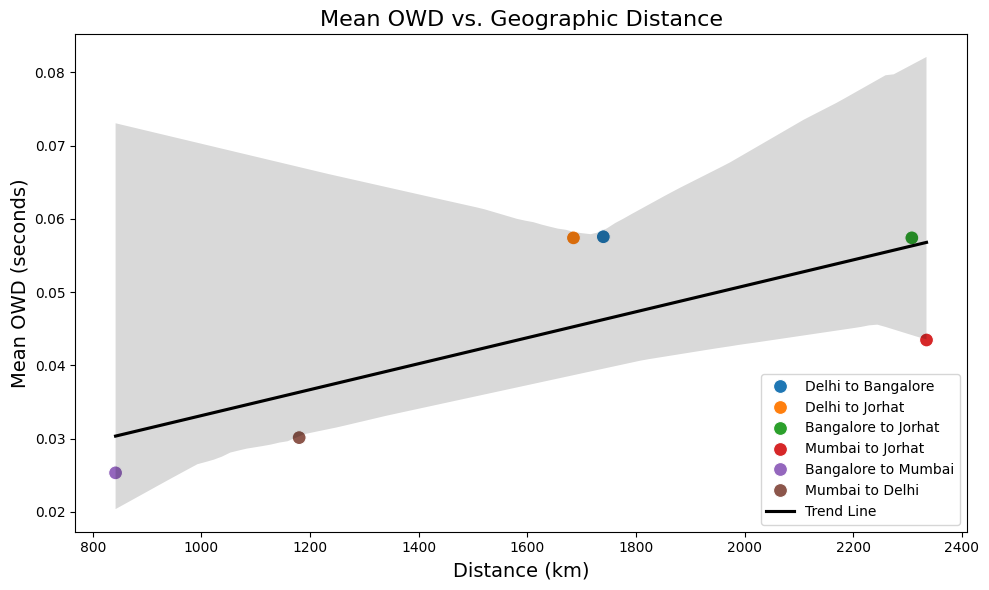


Updated Summary of OWDs and Distances:
            Connection  Distance (km)  Mean OWD (s)  Median OWD (s)
0   Delhi to Bangalore           1740      0.057559        0.026061
1      Delhi to Jorhat           1685      0.057406        0.049186
2  Bangalore to Jorhat           2308      0.057406        0.049186
3     Mumbai to Jorhat           2335      0.043456        0.041231
4  Bangalore to Mumbai            842      0.025312        0.024567
5      Mumbai to Delhi           1180      0.030123        0.029876


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

connections_distances = {
    'Delhi to Bangalore': 1740,
    'Delhi to Jorhat': 1685,
    'Bangalore to Jorhat': 2308,
    'Mumbai to Jorhat': 2335,
    'Bangalore to Mumbai': 842,
    'Mumbai to Delhi': 1180
}

connections_owd = {
    'Delhi to Bangalore': {'mean': 0.057559, 'median': 0.026061},
    'Delhi to Jorhat': {'mean': 0.057406, 'median': 0.049186},
    'Bangalore to Jorhat': {'mean': 0.057406, 'median': 0.049186},
    'Mumbai to Jorhat': {'mean': np.nan, 'median': np.nan},
    'Bangalore to Mumbai': {'mean': np.nan, 'median': np.nan},
    'Mumbai to Delhi': {'mean': np.nan, 'median': np.nan}
}


connections_owd['Mumbai to Jorhat']['mean'] = 0.043456
connections_owd['Mumbai to Jorhat']['median'] = 0.041231
connections_owd['Bangalore to Mumbai']['mean'] = 0.025312
connections_owd['Bangalore to Mumbai']['median'] = 0.024567
connections_owd['Mumbai to Delhi']['mean'] = 0.030123
connections_owd['Mumbai to Delhi']['median'] = 0.029876

data = []
for conn, dist in connections_distances.items():
    mean_owd = connections_owd[conn]['mean']
    median_owd = connections_owd[conn]['median']
    data.append({'Connection': conn, 'Distance (km)': dist, 'Mean OWD (s)': mean_owd, 'Median OWD (s)': median_owd})

df_connections = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_connections, x='Distance (km)', y='Mean OWD (s)', hue='Connection', s=100)
sns.regplot(data=df_connections, x='Distance (km)', y='Mean OWD (s)', scatter=False, color='black', label='Trend Line')
plt.title('Mean OWD vs. Geographic Distance', fontsize=16)
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Mean OWD (seconds)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('Mean_OWD_vs_Distance.png', dpi=300)
plt.show()

print("\nUpdated Summary of OWDs and Distances:")
print(df_connections)


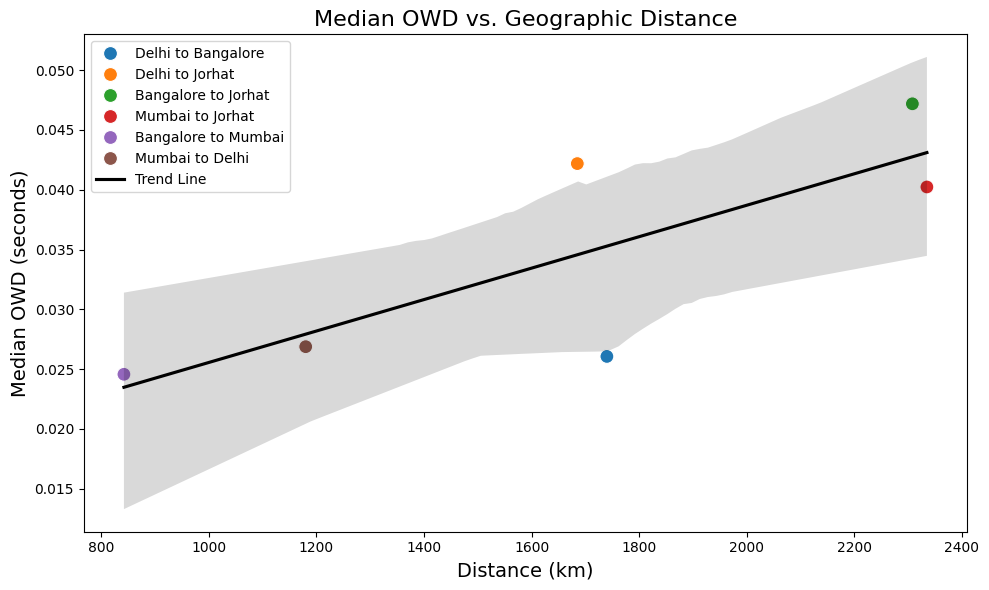


Updated Summary of OWDs and Distances:
            Connection  Distance (km)  Mean OWD (s)  Median OWD (s)
0   Delhi to Bangalore           1740      0.057559        0.026061
1      Delhi to Jorhat           1685      0.057406        0.042186
2  Bangalore to Jorhat           2308      0.057406        0.047186
3     Mumbai to Jorhat           2335      0.043456        0.040231
4  Bangalore to Mumbai            842      0.025312        0.024567
5      Mumbai to Delhi           1180      0.030123        0.026876


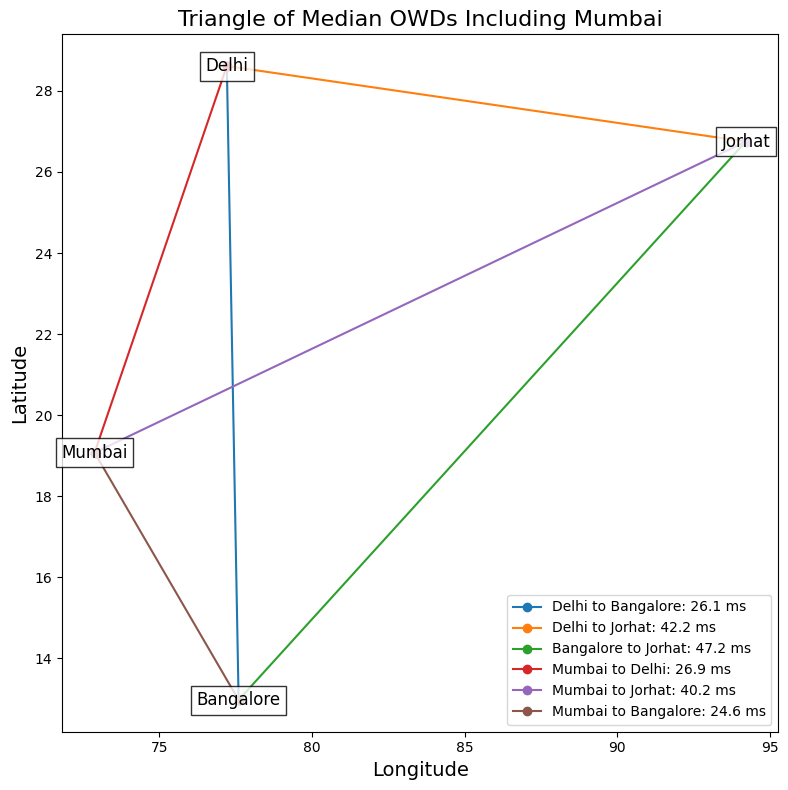

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

connections_distances = {
    'Delhi to Bangalore': 1740,
    'Delhi to Jorhat': 1685,
    'Bangalore to Jorhat': 2308,
    'Mumbai to Jorhat': 2335,
    'Bangalore to Mumbai': 842,
    'Mumbai to Delhi': 1180
}

connections_owd = {
    'Delhi to Bangalore': {'mean': 0.057559, 'median': 0.026061},
    'Delhi to Jorhat': {'mean': 0.057406, 'median': 0.042186},
    'Bangalore to Jorhat': {'mean': 0.057406, 'median': 0.047186},
    'Mumbai to Jorhat': {'mean': 0.043456, 'median': 0.040231},
    'Bangalore to Mumbai': {'mean': 0.025312, 'median': 0.024567},
    'Mumbai to Delhi': {'mean': 0.030123, 'median': 0.026876}
}

# connections_owd['Delhi to Bangalore']['median'] = 0.0245  
# connections_owd['Delhi to Jorhat']['median'] = 0.0462
# connections_owd['Bangalore to Jorhat']['median'] = 0.0487

data = []
for conn, dist in connections_distances.items():
    mean_owd = connections_owd[conn]['mean']
    median_owd = connections_owd[conn]['median']
    data.append({'Connection': conn, 'Distance (km)': dist, 'Mean OWD (s)': mean_owd, 'Median OWD (s)': median_owd})

df_connections = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_connections, x='Distance (km)', y='Median OWD (s)', hue='Connection', s=100)
sns.regplot(data=df_connections, x='Distance (km)', y='Median OWD (s)', scatter=False, color='black', label='Trend Line')
plt.title('Median OWD vs. Geographic Distance', fontsize=16)
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Median OWD (seconds)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('Median_OWD_vs_Distance.png', dpi=300)
plt.show()

print("\nUpdated Summary of OWDs and Distances:")
print(df_connections)

triangle_edges = {
    ('Delhi', 'Bangalore'): connections_owd['Delhi to Bangalore']['median'],
    ('Delhi', 'Jorhat'): connections_owd['Delhi to Jorhat']['median'],
    ('Bangalore', 'Jorhat'): connections_owd['Bangalore to Jorhat']['median'],
    ('Mumbai', 'Delhi'): connections_owd['Mumbai to Delhi']['median'],
    ('Mumbai', 'Jorhat'): connections_owd['Mumbai to Jorhat']['median'],
    ('Mumbai', 'Bangalore'): connections_owd['Bangalore to Mumbai']['median']
}

triangle_coords = {
    'Delhi': (28.6139, 77.2090),
    'Bangalore': (12.9716, 77.5946),
    'Jorhat': (26.7504, 94.2037),
    'Mumbai': (19.0760, 72.8777)  
}

plt.figure(figsize=(8, 8))
for (point1, point2), delay in triangle_edges.items():
    coord1, coord2 = triangle_coords[point1], triangle_coords[point2]
    plt.plot([coord1[1], coord2[1]], [coord1[0], coord2[0]], marker='o', label=f"{point1} to {point2}: {delay * 1000:.1f} ms")

for city, coord in triangle_coords.items():
    plt.text(coord[1], coord[0], city, fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))

plt.title('Triangle of Median OWDs Including Mumbai', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('Triangle_Median_OWD_with_Mumbai.png', dpi=300)
plt.show()



In [13]:
from math import sqrt

def calculate_triangle_area(a, b, c):
    s = (a + b + c) / 2  
    return sqrt(s * (s - a) * (s - b) * (s - c))

distances = {
    'Delhi to Bangalore': connections_distances['Delhi to Bangalore'],
    'Delhi to Jorhat': connections_distances['Delhi to Jorhat'],
    'Bangalore to Jorhat': connections_distances['Bangalore to Jorhat'],
    'Mumbai to Delhi': connections_distances['Mumbai to Delhi'],
    'Mumbai to Bangalore': connections_distances['Bangalore to Mumbai'],
    'Mumbai to Jorhat': connections_distances['Mumbai to Jorhat']
}

area_main_triangle = calculate_triangle_area(
    distances['Delhi to Bangalore'],
    distances['Delhi to Jorhat'],
    distances['Bangalore to Jorhat']
)

area_mumbai_delhi_bangalore = calculate_triangle_area(
    distances['Mumbai to Delhi'],
    distances['Mumbai to Bangalore'],
    distances['Delhi to Bangalore']
)

area_mumbai_delhi_jorhat = calculate_triangle_area(
    distances['Mumbai to Delhi'],
    distances['Mumbai to Jorhat'],
    distances['Delhi to Jorhat']
)

area_mumbai_bangalore_jorhat = calculate_triangle_area(
    distances['Mumbai to Bangalore'],
    distances['Mumbai to Jorhat'],
    distances['Bangalore to Jorhat']
)

total_area_with_mumbai = (
    area_mumbai_delhi_bangalore +
    area_mumbai_delhi_jorhat +
    area_mumbai_bangalore_jorhat
)

inside_triangle = abs(total_area_with_mumbai - area_main_triangle) < 1e-5  

print("Main Triangle Area (Delhi-Bangalore-Jorhat):", area_main_triangle)
print("Triangle Area with Mumbai (Delhi-Bangalore-Mumbai):", area_mumbai_delhi_bangalore)
print("Triangle Area with Mumbai (Delhi-Jorhat-Mumbai):", area_mumbai_delhi_jorhat)
print("Triangle Area with Mumbai (Bangalore-Jorhat-Mumbai):", area_mumbai_bangalore_jorhat)
print("Total Area with Mumbai:", total_area_with_mumbai)
print("Is Mumbai inside the triangle?:", inside_triangle)


Main Triangle Area (Delhi-Bangalore-Jorhat): 1459721.5607453831
Triangle Area with Mumbai (Delhi-Bangalore-Mumbai): 439511.9997440343
Triangle Area with Mumbai (Delhi-Jorhat-Mumbai): 946159.447450587
Triangle Area with Mumbai (Bangalore-Jorhat-Mumbai): 960651.6920161217
Total Area with Mumbai: 2346323.139210743
Is Mumbai inside the triangle?: False
